# <center> Лабораторная 1 </center>
## <center> Работа с данными</center>

### Целевая переменные - G_total и RUA
*   гистограмма распределений значений
*   диаграмма важности признаков (gain_ratio)
*   корреляции - тепловая карта признаков
*   высокий процент пропущенных значений
*   количество уникальных значений


In [34]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sklearn.datasets
from sklearn import tree
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from google.colab import drive

В исходной таблице:


*   удалены строки с тремя последними пустыми ячейками, оставшиеся строки сдвинуты;
*   две последних колонки объединены в одину, лишняя колонка удалена;
*   символы " ", "-", "не спускался"  заменены на NaN
*   удалены признаки с пропусками более 60 % (кроме целевых)

Предобработка произведена в [DatasetHandler](https://github.com/Malovichko/DatasetHandler) 

In [35]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
drive.mount('/content/drive', force_remount=True)
data = pd.read_excel('drive/MyDrive/outputDataset.xlsx')
data

Mounted at /content/drive


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,осредненные параметры,Unnamed: 5,Unnamed: 6,На конец режима,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Стандартные условия,Unnamed: 15,Unnamed: 16,Unnamed: 17,Линейные условия,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32
0,NaN,NaN,Глубина манометра,Dшт,Руст,Рзаб,Pлин,Руст,Рзаб,Рлин,Туст,Тна шлейфе,Тзаб,Tлин,Дебит газа,Дебит ст. конд.,Дебит воды,Дебит смеси,Дебит гааз,Дебит кон нестабильный,Дебит воды,Нэф,Рпл. Тек (послед точка на КВД),Рпл. Тек (Расчет по КВД),Рпл. Тек (Карноухов),Pсб,Pсб,NaN,Ro_c,NaN,Удельная плотность газа,G_total,КГФ
1,№,дд.мм.гггг,м,мм,бара,бара,бара,бар,бар,бар,С,С,С,С,1000 м3/сут,м3/сут,м3/сут,1000 м3/сут,м3/сут,м3/сут,м3/сут,м,МПа,МПа,МПа,атм,бар,NaN,кг/м3,NaN,б/р,кг/с,г/м3
2,804,2008-06-05 00:00:00,3576.3,7.94,249.6,370.1,101.8,249,359.6,101.8,53,31.7,103.2,32.5,214.704,83.6,0.4,231.249,1610.37,131.3,0.4,56.8,45.25,56.5,NaN,93.6,92.376,NaN,801,NaN,0.669449,0.775042,311.909
3,804,2008-06-06 00:00:00,3576.3,9.53,233.5,364.6,101.3,231,338.1,102.4,58.8,37.6,103,38.6,290.594,104.7,1.4,309.002,2310.23,158.5,1.4,56.8,45.25,56.5,NaN,92.9,91.6852,NaN,801,NaN,0.669449,0.970656,288.6
4,804,2008-06-07 00:00:00,3576.3,11.11,213.4,357.1,101.6,211,314.8,100.6,63.6,42.8,102.6,43.4,368.042,114.3,1.9,388.115,3039.49,172.3,1.9,56.8,45.25,56.5,NaN,91.4,90.2048,NaN,801,NaN,0.669449,1.05966,248.791
5,804,2008-06-08 00:00:00,3576.3,12.7,191.6,347.4,98.4,187,291.5,99,64.7,46.2,102,46.1,434.663,121.3,3.3,455.215,3824.08,181.5,3.3,56.8,45.25,56.5,NaN,89.2,88.0336,NaN,801,NaN,0.669449,1.12455,223.559
6,804,2008-06-09 00:00:00,3576.3,14.29,171.9,337.7,99.2,169,270.3,99.5,64,49.4,104.4,49.9,483.283,129.8,4.6,504.588,4299.1,190.6,4.7,56.8,45.25,56.5,NaN,89.7,88.527,NaN,801,NaN,0.669449,1.20335,215.149
7,804,2011-06-17 00:00:00,3576.3,9.53,199.5,286.4,106.362,199.5,286.6,106.19,57.5,38.8,102.64,38.9797,251.7,76.8,0.6,268.896,1921,119,0.6,56.8,41.2243,48.3,NaN,90.7,89.5139,NaN,789.8,NaN,0.675,0.702044,241.131
8,807,2007-05-09 00:00:00,3667,7.94,252,354.334,102.932,252,354.2,101.565,56,NaN,105.3,32.9973,234.857,56.0686,0,261.281,1807.4,90.4,0,57.2,38.74,50.8596,50.1,100.9,99.5806,NaN,787,NaN,0.659,NaN,188
9,807,2007-05-10 00:00:00,3667,9.53,250,350.2,103.187,250,349.1,103.323,61,NaN,105.2,39.0609,326.224,73.8872,0,362.085,2532.4,118,0,57.2,38.74,50.8596,50.1,100.1,98.791,NaN,787,NaN,0.659,NaN,178


Удаляем:


*   столбцы с датой и №;
*   пустые столбцы, появившиеся ранее после удаления признаков с большим количеством пропусков.



In [36]:
del data['Unnamed: 0']
del data['Unnamed: 1']
del data['Unnamed: 27']
del data['Unnamed: 29']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Unnamed: 2             92 non-null     object
 1   Unnamed: 3             95 non-null     object
 2   осредненные параметры  95 non-null     object
 3   Unnamed: 5             92 non-null     object
 4   Unnamed: 6             95 non-null     object
 5   На конец режима        95 non-null     object
 6   Unnamed: 8             92 non-null     object
 7   Unnamed: 9             95 non-null     object
 8   Unnamed: 10            95 non-null     object
 9   Unnamed: 11            62 non-null     object
 10  Unnamed: 12            92 non-null     object
 11  Unnamed: 13            95 non-null     object
 12  Стандартные условия    95 non-null     object
 13  Unnamed: 15            95 non-null     object
 14  Unnamed: 16            95 non-null     object
 15  Unnamed: 17            91

Информацию о признаках добавим в заголовки

In [37]:
data.iloc[0] = data.iloc[0].fillna('')

data.columns = '[' + data.columns + '] ' + data.iloc[0] + '(' + data.iloc[1] + ')'
data.columns = data.columns.str.replace('Unnamed: ','')
data.columns = data.columns.str.replace('осредненные параметры','4')
data.columns = data.columns.str.replace('На конец режима','7')
data.columns = data.columns.str.replace('Стандартные условия','14')
data.columns = data.columns.str.replace('Линейные условия','18')
data = data.drop([0, 1])
data

,[2] Глубина манометра(м),[3] Dшт(мм),[4] Руст(бара),[5] Рзаб(бара),[6] Pлин(бара),[7] Руст(бар),[8] Рзаб(бар),[9] Рлин(бар),[10] Туст( С),[11] Тна шлейфе( С),[12] Тзаб( С),[13] Tлин( С),[14] Дебит газа(1000 м3/сут),[15] Дебит ст. конд.(м3/сут),[16] Дебит воды(м3/сут),[17] Дебит смеси(1000 м3/сут),[18] Дебит гааз(м3/сут),[19] Дебит кон нестабильный(м3/сут),[20] Дебит воды(м3/сут),[21] Нэф(м),[22] Рпл. Тек (послед точка на КВД)(МПа),[23] Рпл. Тек (Расчет по КВД)(МПа),[24] Рпл. Тек (Карноухов)(МПа),[25] Pсб( атм),[26] Pсб( бар),[28] Ro_c(кг/м3),[30] Удельная плотность газа (б/р),[31] G_total(кг/с),[32] КГФ(г/м3)
2,3576.3,7.94,249.6,370.1,101.8,249,359.6,101.8,53,31.7,103.2,32.5,214.704,83.6,0.4,231.249,1610.37,131.3,0.4,56.8,45.25,56.5,NaN,93.6,92.376,801,0.669449,0.775042,311.909
3,3576.3,9.53,233.5,364.6,101.3,231,338.1,102.4,58.8,37.6,103,38.6,290.594,104.7,1.4,309.002,2310.23,158.5,1.4,56.8,45.25,56.5,NaN,92.9,91.6852,801,0.669449,0.970656,288.6
4,3576.3,11.11,213.4,357.1,101.6,211,314.8,100.6,63.6,42.8,102.6,43.4,368.042,114.3,1.9,388.115,3039.49,172.3,1.9,56.8,45.25,56.5,NaN,91.4,90.2048,801,0.669449,1.05966,248.791
5,3576.3,12.7,191.6,347.4,98.4,187,291.5,99,64.7,46.2,102,46.1,434.663,121.3,3.3,455.215,3824.08,181.5,3.3,56.8,45.25,56.5,NaN,89.2,88.0336,801,0.669449,1.12455,223.559
6,3576.3,14.29,171.9,337.7,99.2,169,270.3,99.5,64,49.4,104.4,49.9,483.283,129.8,4.6,504.588,4299.1,190.6,4.7,56.8,45.25,56.5,NaN,89.7,88.527,801,0.669449,1.20335,215.149
7,3576.3,9.53,199.5,286.4,106.362,199.5,286.6,106.19,57.5,38.8,102.64,38.9797,251.7,76.8,0.6,268.896,1921,119,0.6,56.8,41.2243,48.3,NaN,90.7,89.5139,789.8,0.675,0.702044,241.131
8,3667,7.94,252,354.334,102.932,252,354.2,101.565,56,NaN,105.3,32.9973,234.857,56.0686,0,261.281,1807.4,90.4,0,57.2,38.74,50.8596,50.1,100.9,99.5806,787,0.659,NaN,188
9,3667,9.53,250,350.2,103.187,250,349.1,103.323,61,NaN,105.2,39.0609,326.224,73.8872,0,362.085,2532.4,118,0,57.2,38.74,50.8596,50.1,100.1,98.791,787,0.659,NaN,178
10,3667,11.11,240,344,105.671,240,344.1,105.589,65,NaN,105.2,44.8966,429.723,92.1267,1.01458,476.205,3392.3,146,1,57.2,38.74,50.8596,50.1,102,100.666,787,0.659,NaN,169
11,3667,12.7,228,336.7,108.1,228,343,108.145,42,NaN,105.1,49.8399,532.283,109.812,1.37842,589.143,4228.8,175.5,1.4,57.2,38.74,50.8596,50.1,103.8,102.443,787,0.659,NaN,162


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 2 to 94
Data columns (total 29 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   [2] Глубина манометра(м)                  90 non-null     object
 1   [3] Dшт(мм)                               93 non-null     object
 2   [4] Руст(бара)                            93 non-null     object
 3   [5] Рзаб(бара)                            90 non-null     object
 4   [6] Pлин(бара)                            93 non-null     object
 5   [7] Руст(бар)                             93 non-null     object
 6   [8] Рзаб(бар)                             90 non-null     object
 7   [9] Рлин(бар)                             93 non-null     object
 8   [10] Туст( С)                             93 non-null     object
 9   [11] Тна шлейфе( С)                       60 non-null     object
 10  [12] Тзаб( С)                             90 non-nul

NaN заменим на медианные значения

In [55]:
data_new = data.fillna(data.median())
data_new['[31] G_total(кг/с)'] = data['[31] G_total(кг/с)']
data = data_new

Считаем корреляцию

In [40]:
data.corr(method='pearson')[data.corr(method='pearson') > 0.90]

,[2] Глубина манометра(м),[3] Dшт(мм),[4] Руст(бара),[5] Рзаб(бара),[6] Pлин(бара),[7] Руст(бар),[8] Рзаб(бар),[9] Рлин(бар),[10] Туст( С),[11] Тна шлейфе( С),[12] Тзаб( С),[13] Tлин( С),[14] Дебит газа(1000 м3/сут),[15] Дебит ст. конд.(м3/сут),[16] Дебит воды(м3/сут),[17] Дебит смеси(1000 м3/сут),[18] Дебит гааз(м3/сут),[19] Дебит кон нестабильный(м3/сут),[20] Дебит воды(м3/сут),[21] Нэф(м),[22] Рпл. Тек (послед точка на КВД)(МПа),[23] Рпл. Тек (Расчет по КВД)(МПа),[24] Рпл. Тек (Карноухов)(МПа),[25] Pсб( атм),[26] Pсб( бар),[28] Ro_c(кг/м3),[30] Удельная плотность газа (б/р),[32] КГФ(г/м3)
[2] Глубина манометра(м),1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
[3] Dшт(мм),NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
[4] Руст(бара),NaN,NaN,1.000000,0.917093,NaN,0.999288,0.937961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
[5] Рзаб(бара),NaN,NaN,0.917093,1.000000,NaN,0.913456,0.977881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
[6] Pлин(бара),NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
[7] Руст(бар),NaN,NaN,0.999288,0.913456,NaN,1.000000,0.937037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
[8] Рзаб(бар),NaN,NaN,0.937961,0.977881,NaN,0.937037,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
[9] Рлин(бар),NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
[10] Туст( С),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
[11] Тна шлейфе( С),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Удаляем по одному из пар сильно коррелирующих признаков 

In [41]:
data.drop(['[5] Рзаб(бара)', 
            '[7] Руст(бар)', 
            '[8] Рзаб(бар)', 
            '[17] Дебит смеси(1000 м3/сут)', 
            '[18] Дебит гааз(м3/сут)', 
            '[20] Дебит воды(м3/сут)', 
            '[26] Pсб( бар)'], 
           axis=1, inplace=True)

Считаем количество уникальных значений


In [43]:
data.nunique()

[2] Глубина манометра(м)                    20
[3] Dшт(мм)                                 10
[4] Руст(бара)                              87
[6] Pлин(бара)                              91
[9] Рлин(бар)                               88
[10] Туст( С)                               51
[11] Тна шлейфе( С)                         58
[12] Тзаб( С)                               69
[13] Tлин( С)                               89
[14] Дебит газа(1000 м3/сут)                93
[15] Дебит ст. конд.(м3/сут)                92
[16] Дебит воды(м3/сут)                     77
[19] Дебит кон нестабильный(м3/сут)         90
[21] Нэф(м)                                 14
[22] Рпл. Тек (послед точка на КВД)(МПа)    22
[23] Рпл. Тек (Расчет по КВД)(МПа)          18
[24] Рпл. Тек (Карноухов)(МПа)              13
[25] Pсб( атм)                              70
[28] Ro_c(кг/м3)                            25
[30] Удельная плотность газа (б/р)          21
[31] G_total(кг/с)                          23
[32] КГФ(г/м3

HeatMap

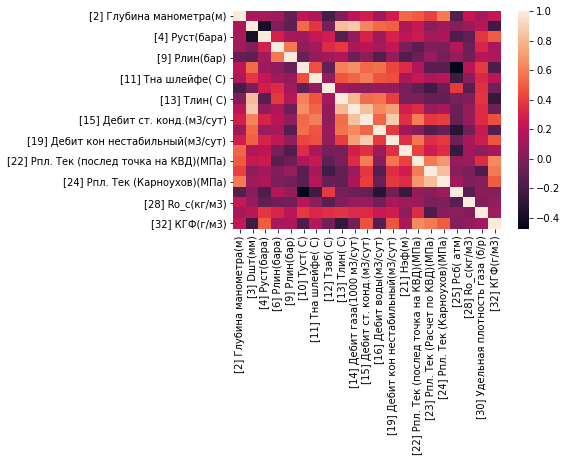

In [44]:
ax = sns.heatmap(data.corr())

В '[31] G_total(кг/с)' пишем 0, если нет значения, 1, если есть значение

In [45]:
data.loc[data['[31] G_total(кг/с)'].isna(),'[31] G_total(кг/с)'] = 0
data.loc[data['[31] G_total(кг/с)'] != 0,'[31] G_total(кг/с)'] = 1
data

,[2] Глубина манометра(м),[3] Dшт(мм),[4] Руст(бара),[6] Pлин(бара),[9] Рлин(бар),[10] Туст( С),[11] Тна шлейфе( С),[12] Тзаб( С),[13] Tлин( С),[14] Дебит газа(1000 м3/сут),[15] Дебит ст. конд.(м3/сут),[16] Дебит воды(м3/сут),[19] Дебит кон нестабильный(м3/сут),[21] Нэф(м),[22] Рпл. Тек (послед точка на КВД)(МПа),[23] Рпл. Тек (Расчет по КВД)(МПа),[24] Рпл. Тек (Карноухов)(МПа),[25] Pсб( атм),[28] Ro_c(кг/м3),[30] Удельная плотность газа (б/р),[31] G_total(кг/с),[32] КГФ(г/м3)
2,3576.3,7.94,249.600000,101.800000,101.800000,53.0,31.7,103.200,32.500000,214.704000,83.600000,0.400000,131.3,56.8000,45.25000,56.5000,50.9,93.6,801.00,0.669449,1,311.909400
3,3576.3,9.53,233.500000,101.300000,102.400000,58.8,37.6,103.000,38.600000,290.594000,104.700000,1.400000,158.5,56.8000,45.25000,56.5000,50.9,92.9,801.00,0.669449,1,288.600300
4,3576.3,11.11,213.400000,101.600000,100.600000,63.6,42.8,102.600,43.400000,368.042000,114.300000,1.900000,172.3,56.8000,45.25000,56.5000,50.9,91.4,801.00,0.669449,1,248.790600
5,3576.3,12.70,191.600000,98.400000,99.000000,64.7,46.2,102.000,46.100000,434.663000,121.300000,3.300000,181.5,56.8000,45.25000,56.5000,50.9,89.2,801.00,0.669449,1,223.559100
6,3576.3,14.29,171.900000,99.200000,99.500000,64.0,49.4,104.400,49.900000,483.283000,129.800000,4.600000,190.6,56.8000,45.25000,56.5000,50.9,89.7,801.00,0.669449,1,215.148600
7,3576.3,9.53,199.500000,106.361669,106.190000,57.5,38.8,102.640,38.979712,251.700000,76.800000,0.600000,119.0,56.8000,41.22431,48.3000,50.9,90.7,789.80,0.675000,1,241.130794
8,3667.0,7.94,252.000000,102.932004,101.565484,56.0,38.7,105.300,32.997275,234.857429,56.068587,0.000000,90.4,57.2000,38.74000,50.8596,50.1,100.9,787.00,0.659000,0,188.000000
9,3667.0,9.53,250.000000,103.186902,103.322581,61.0,38.7,105.200,39.060921,326.224449,73.887158,0.000000,118.0,57.2000,38.74000,50.8596,50.1,100.1,787.00,0.659000,0,178.000000
10,3667.0,11.11,240.000000,105.671499,105.588710,65.0,38.7,105.200,44.896592,429.722850,92.126725,1.014583,146.0,57.2000,38.74000,50.8596,50.1,102.0,787.00,0.659000,0,169.000000
11,3667.0,12.70,228.000000,108.100063,108.144839,42.0,38.7,105.100,49.839872,532.283025,109.812176,1.378418,175.5,57.2000,38.74000,50.8596,50.1,103.8,787.00,0.659000,0,162.000000


Важность признаков

In [46]:
x =  data.drop(['[31] G_total(кг/с)','[32] КГФ(г/м3)'], axis=1)
y =  data.iloc[:, [data.shape[1] - 2, data.shape[1] - 1]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 1)
reg = RandomForestRegressor()
reg.fit(x_train, y_train)
pred_y = reg.predict(x_train)
pred_y = np.asmatrix(pred_y)
feats = {}
for feature, importance in zip(x.columns, reg.feature_importances_): 
  feats[feature] = importance

importances = pd.DataFrame.from_dict(feats, orient='index')
importances = importances.rename(columns={0: 'Важность признака'})
importances = importances.sort_values(by='Важность признака', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Признак'})

importances

,Признак,Важность признака
0,[22] Рпл. Тек (послед точка на КВД)(МПа),0.277925
1,[23] Рпл. Тек (Расчет по КВД)(МПа),0.147989
2,[4] Руст(бара),0.131527
3,[28] Ro_c(кг/м3),0.093355
4,[14] Дебит газа(1000 м3/сут),0.052397
5,[10] Туст( С),0.046567
6,[19] Дебит кон нестабильный(м3/сут),0.043048
7,[13] Tлин( С),0.032736
8,[25] Pсб( атм),0.023631
9,[16] Дебит воды(м3/сут),0.021981


диаграмма

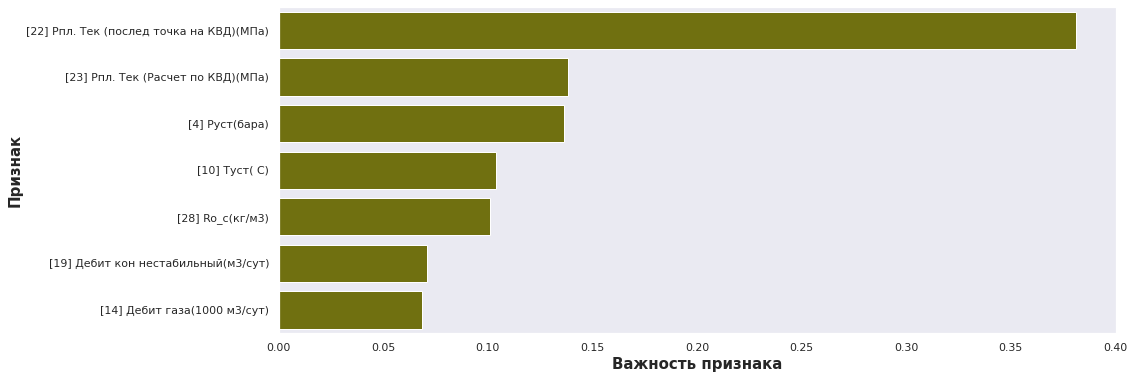

In [65]:
sns.set(font_scale = 4)
sns.set(style="dark", color_codes=True, font_scale = 1)
fig, ax = plt.subplots()
fig.set_size_inches(15,6)
sns.barplot(x = importances['Важность признака'], y = importances['Признак'], data=importances, color='olive')

plt.xlabel('Важность признака', fontsize=15, weight = 'bold')
plt.ylabel('Признак', fontsize=15, weight = 'bold')

plt.show()

Признаки с низкой важностью удаляем

In [48]:
imp = importances.loc[importances['Важность признака'] < 0.04]
data.drop(importances.loc[importances['Важность признака'] < 0.04,'Признак'], axis=1,inplace=True)

x =  data.drop(['[31] G_total(кг/с)','[32] КГФ(г/м3)'], axis=1)
y =  data.iloc[:, [data.shape[1] - 2, data.shape[1] - 1]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 1)

reg = RandomForestRegressor()
reg.fit(x_train, y_train)
pred_y = reg.predict(x_train)

feats = {}
for feature, importance in zip(x.columns, reg.feature_importances_): 
  feats[feature] = importance

importances = pd.DataFrame.from_dict(feats, orient='index')
importances = importances.rename(columns={0: 'Важность признака'})
importances = importances.sort_values(by='Важность признака', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Признак'})

importances

,Признак,Важность признака
0,[22] Рпл. Тек (послед точка на КВД)(МПа),0.380998
1,[23] Рпл. Тек (Расчет по КВД)(МПа),0.138300
2,[4] Руст(бара),0.136341
3,[10] Туст( С),0.103886
4,[28] Ro_c(кг/м3),0.100827
5,[19] Дебит кон нестабильный(м3/сут),0.070908
6,[14] Дебит газа(1000 м3/сут),0.068740


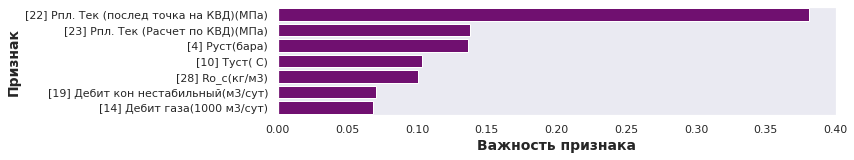

In [63]:
sns.set(font_scale = 4)
sns.set(style="dark", color_codes=False, font_scale = 1)
fig, ax = plt.subplots()
fig.set_size_inches(10,2)
sns.barplot(x = importances['Важность признака'], y = importances['Признак'], data=importances, color='purple')

plt.xlabel('Важность признака', fontsize=14, weight = 'bold')
plt.ylabel('Признак', fontsize=14, weight = 'bold')

plt.show()

посчитаем ошибку

In [50]:
n_test_y = np.asmatrix(y_train)
pred_y = np.asmatrix(pred_y)
print('Mean_absolute_error: ', metrics.mean_absolute_error(n_test_y, pred_y))
print('Score: ', reg.score(x_test, y_test))
print('r2 score ', metrics.r2_score(n_test_y, pred_y))

Mean_absolute_error:  3.1100378903993215
Score:  0.7762692888350072
r2 score  0.970230607414978


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 2 to 94
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   [4] Руст(бара)                            93 non-null     float64
 1   [10] Туст( С)                             93 non-null     float64
 2   [14] Дебит газа(1000 м3/сут)              93 non-null     float64
 3   [19] Дебит кон нестабильный(м3/сут)       93 non-null     float64
 4   [22] Рпл. Тек (послед точка на КВД)(МПа)  93 non-null     float64
 5   [23] Рпл. Тек (Расчет по КВД)(МПа)        93 non-null     float64
 6   [28] Ro_c(кг/м3)                          93 non-null     float64
 7   [31] G_total(кг/с)                        93 non-null     object 
 8   [32] КГФ(г/м3)                            93 non-null     float64
dtypes: float64(8), object(1)
memory usage: 7.3+ KB


Количество уникальных значений полученных признаков

In [53]:
data.nunique()

[4] Руст(бара)                              87
[10] Туст( С)                               51
[14] Дебит газа(1000 м3/сут)                93
[19] Дебит кон нестабильный(м3/сут)         90
[22] Рпл. Тек (послед точка на КВД)(МПа)    22
[23] Рпл. Тек (Расчет по КВД)(МПа)          18
[28] Ro_c(кг/м3)                            25
[31] G_total(кг/с)                           2
[32] КГФ(г/м3)                              72
dtype: int64

Гистограммы распределений значений

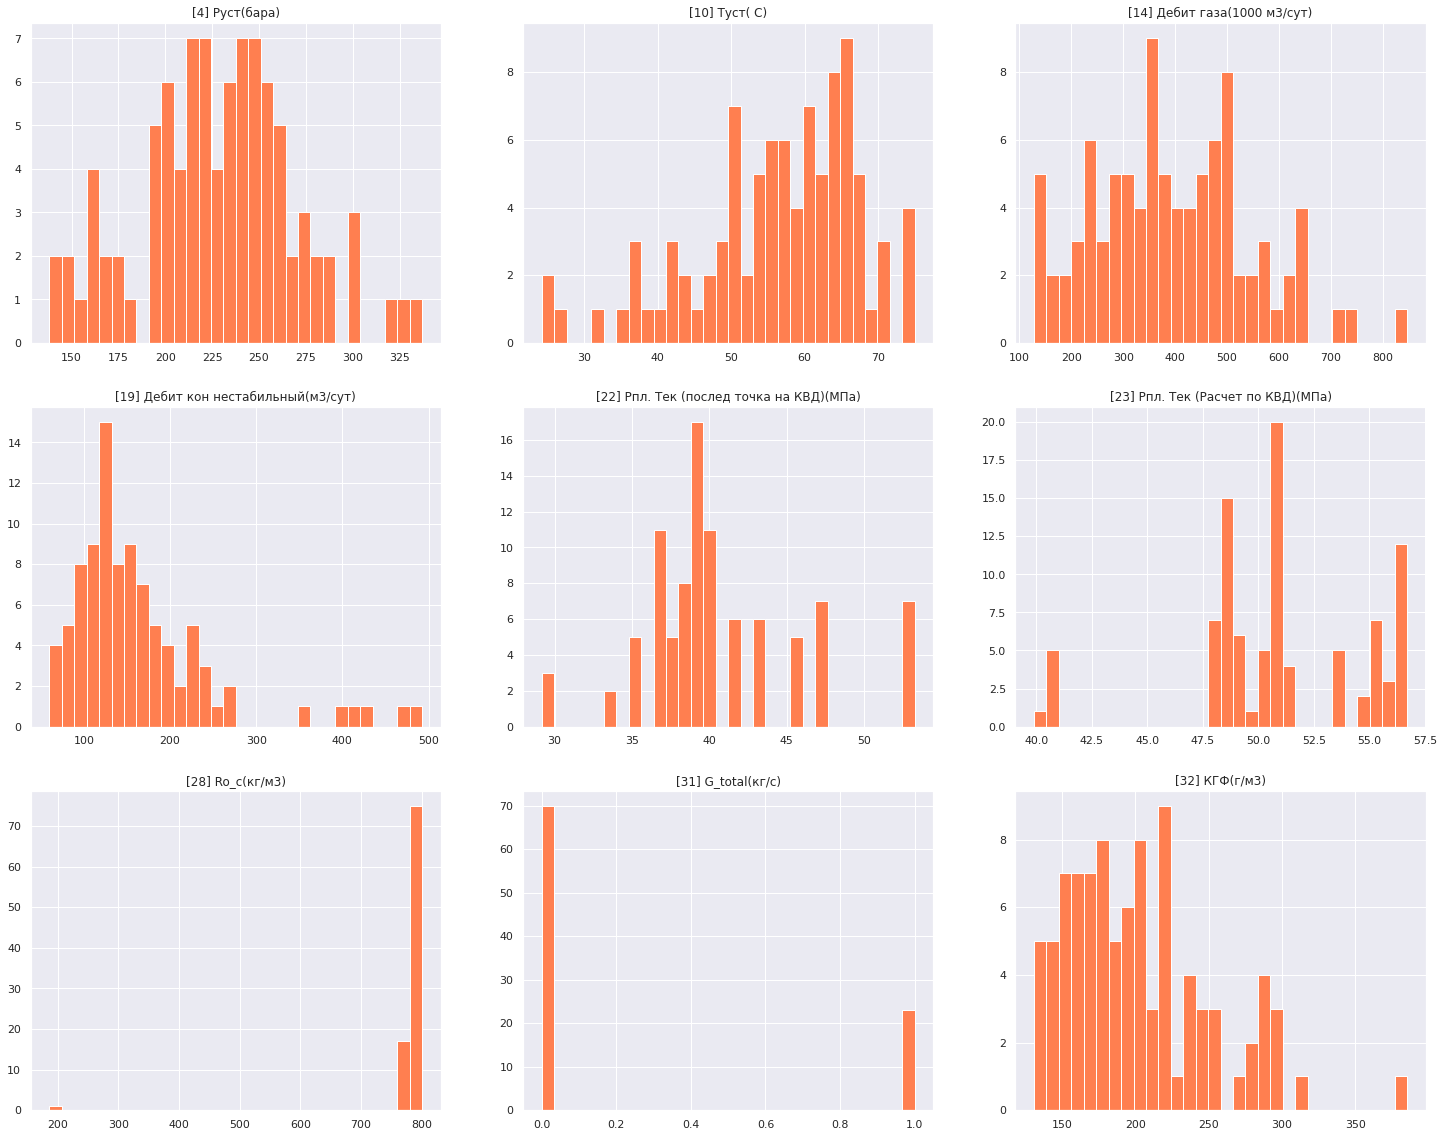

In [66]:
fig, axes = plt.subplots(3, 3)
fig.set_size_inches(w=25.0, h=20)
j = 1
k = 0
for i in data.columns:
  if(j%4==0):
    k+=1
    j=1
  data[i].hist(ax = axes[k][j-1], bins = 30, color = 'Coral')
  axes[k][j-1].set_title(i)
  j+=1